In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,300):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

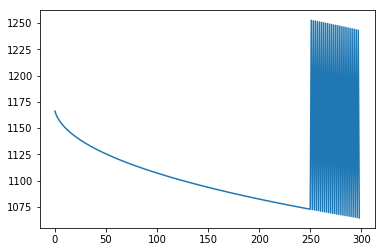

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

Here we define the material properties for the 1080 low carbon stainless steel. The data are taken from the paper (ref).
Data are saved in the text file for reading.

In [6]:
def read_properties():
    # read the text file for different properties
    densityP = np.loadtxt(fname='./density1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    densityMA = np.loadtxt(fname='./density1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    conductivityP = np.loadtxt(fname='./conductivity1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    conductivityM = np.loadtxt(fname='./conductivity1080Martensite.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='./conductivity1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    
    specificP = np.loadtxt(fname='./specificheat1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    specificMA = np.loadtxt(fname='./specificheat1080MartensiteAustenite.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityP,densityMA,conductivityP,conductivityM, conductivityA,specificP,specificMA)

Interpolate the experimental data to get interpolating function:

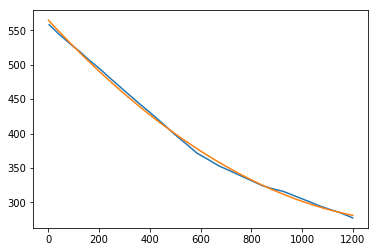

In [7]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline, CubicSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
def specific_heat(x,a,b,c):
    return a*x**2 + b*x + c
    
#density polynomial
densP = [0.]
condM = [0.]
specificM = [0.]

densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
specificMA = read_properties()[6]
specificM,pcov = curve_fit(specific_heat,specificMA[:,0],specificMA[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]
def sM(t_):
    return specificM[0]*t_**2+ specificM[1]*t_ + specificM[2]

plt.plot(specificMA[:,0],specificMA[:,1])
w = np.linspace(0,1200,100)
plt.plot(w,sM(w))

We now reading the data for cooling coeficient $h_{rc}$. This coefficient contains both contributions from the radiation and convection heat transfer. The data are taken from "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang

/Users/toniivas/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


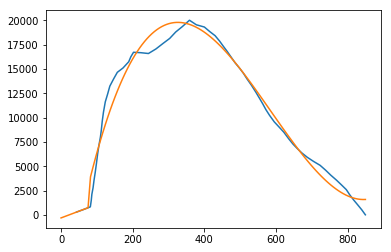

In [8]:
def read_cooling_transfer():
     return np.loadtxt(fname='./cooling1080steel.txt', comments='#', delimiter=',', dtype='double')
def cooling(x,  x0, a,b,c,d,e,f):
    return np.piecewise(x, [x < 82, x >= 82],
                        [lambda x: a*x +b, lambda x: c*x**3+d*x**2+e*x + f])
    
hrcP=[0.]
hrc = read_cooling_transfer()
hrcP,pconv = curve_fit(cooling,hrc[:,0],hrc[:,1])
def hrcf(t_):
      return np.piecewise(t_, [t_ < 82, t_ >= 82],
                        [lambda t_: hrcP[1]*t_ +hrcP[2], lambda t_: hrcP[3]*t_**3+hrcP[4]*t_**2+hrcP[5]*t_ + hrcP[6] ])
        
plt.plot(hrc[:,0],hrc[:,1])
tw = np.linspace(0,850,125)
plt.plot(tw,cooling(tw, *hrcP))

In this section we are reading the data from experimental TTT diagram to evaluate the values of the material parameters $k(T_j)$ and $n(T_j)$. Using the previous equations we can calculate the value of $k(T_j)$:
$$
k(T_j)=-ln(1-F_s)/\theta_j^{n(T_j)}
$$
and
$$
n(T_j)=\frac{ln(\frac{ln(1-F_s)}{ln(1-F_e)})}{ln(\frac{\theta_s}{\theta_e})}
$$
where $\theta$ repesents the equivalent transformation time. $F_s$ and $F_e$ are start fraction of the phase and end fraction of the phase, repectively (usually defined $F_s=0.005$ and $F_e=0.995$).

In this code we first read the experimental data to arrays and then fit x and y data with cubic spline. This gives us information for complete temperature range. The values of $k(T_j)$ and $n(T_j)$ are then calculate using the previous equations.

[227.7031 248.6139 268.453  285.2921 301.1113 312.9181 320.7423 328.5739
 338.3411 347.1182 356.8928 366.6823 378.4594 392.2464 402.0359 417.818
 436.5852 457.3772 480.1865 502.0206 524.8894 550.8473 576.8572 595.9365
 615.0381 626.1966 640.3552 650.5459 659.7614 668.9843 675.1998 683.5218
 690.8463 696.1162 701.5051 704.8766 708.2036 710.4586 712.7361 713.9862
 715.2215 717.4692 718.0116 718.2345 719.4327 719.6705 720.9726]


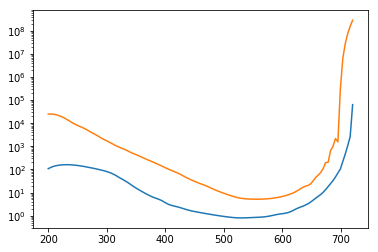

In [9]:
def read_ttt():
    austenite= np.loadtxt(fname='./TTT-diagram1080Austenite.txt', comments='#', delimiter=',', dtype='double')
    pearlite = np.loadtxt(fname='./TTT-diagram1080Pearlite.txt', comments='#', delimiter=',', dtype='double')
    return (austenite, pearlite)
austeniteP=[0.]
pearliteP=[0.]

(austenite_line, pearlite_line) = read_ttt()

def austenitef(x, a, b, c, d, e, f, i,j,k):
    return b*np.tanh(x-700)
austeniteP,pconv = curve_fit(austenitef,austenite_line[:,1],austenite_line[:,0])
print np.flipud(austenite_line[:,1])
pearlitespl=CubicSpline(np.flipud(pearlite_line[:,1]),np.flipud(pearlite_line[:,0]))
austenitespl=CubicSpline(np.flipud(austenite_line[:,1]),np.flipud(austenite_line[:,0]))
#plt.semilogy(pearlite_line[:,1], pearlite_line[:,0])
wt = np.linspace(200,720,125)
plt.semilogy(wt, austenitespl(wt))
plt.semilogy(wt, pearlitespl(wt))
#plt.semilogx(pearlite_line[:,0], pearlite_line[:,1])
#np.log(austenite_line[:,1])
#np.log(-np.log(1.-austenite_line[:,1]))
#np.log(austenite_line[:,0])


#plt.plot(np.log(austenite_line[:,0]),np.log(austenite_line[:,1]))
austeniteP
def calcn(Fs, Fe, startspl,endspl, temperature):
    #determine theta for different temperature
    thetas = startspl(temperature)
    thetae = endspl(temperature)
    return np.log(np.log(1-Fs)/np.log(1-Fe))/np.log(thetas/thetae)

n=calcn(0.005,0.995,austenitespl, pearlitespl, wt) #test calculations
def calck(Fs,n,startspl, temperature):
    #determine k
    thetas = startspl(temperature)
    return -np.log(1-Fs)/(thetas**n)
    
k=calck(0.005,n,austenitespl,wt) #test calculations

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [10]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [11]:
fi = CellVariable(mesh=mesh, name='fractions', hasOld=True, value=0.0)
fp = CellVariable(mesh=mesh, name='frac. pearlite', hasOld=True, value=0.0)
xi = CellVariable(mesh=mesh, name='volume fract.',hasOld=True, value=0.)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
tincubation = CellVariable(mesh = mesh, name='incubation', value=0., hasOld=True)
n = CellVariable(mesh = mesh, name='jmak exponent', value=0.)
k = CellVariable(mesh = mesh, name='jmak coeff', value=0.)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [12]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
#temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = hrcf(temperature.faceValue.value)*(temperature.faceValue-t_inf) #changed the default value to exp. measured 

Calculation of the transformation time (incubation time) before start of diffusive reaction:

In [13]:
def transformation_time(fp,k,n):
    return (np.log(1./(1.-fp)) / k)**(1./n)
def volume_fraction(time,k,n):
    fp.setValue(1-np.exp(-k*time**n), where= tincubation > 1.)

For now we are assuming that complete austinite is transforming directly in martensite phase. We are using here Koistinen-Marburger law:
$$
F_m = (1-exp(-\alpha(T_{ms}-T))(1-\sum_{i=1}F_i)
$$
where $F_i$ represent the fraction of the different fractions of the perlite, banite and austinite phase. The sumation is not done for martensite phase. 
Alpha is constant taken from the paper 

In [14]:
alpha = 1.10E-2; 
Tm= 230+273;    # martensitic start temperature for 1080 steel
def koistinen_marburger(temperature):
    #fi.setValue(1.0-np.exp(-alpha*(Tm-temperature)), where=Tm-temperature > 0)
    fi.setValue( (1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)))*(1.0-fp), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [15]:
deltaHm = 640e+6  # martensite enthalpy
deltaHp = 1.56e+9 + 1.5e+6*temperature # pearlite enthalpy
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)+TransientTerm(var=fp,coeff=deltaHp)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.

In [16]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=cM(temperature),var=temperature)+(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

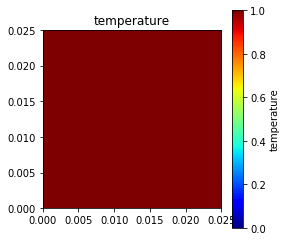

In [17]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [18]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    fp.updateOld()
    
    # calculate incubation time
    n = calcn(0.005,0.995,austenitespl, pearlitespl, temperature)
    k = calck(0.005,n,austenitespl,temperature)
    tt = transformation_time(fp,k,n)
    tincubation.setValue(tincubation.value + dt/austenitespl(temperature))
    print tincubation
    # calculate volume fraction of the pearlite phase
    # the reaction start when incubation time reaches 1.0
    volume_fraction(tt+dt,k,n) 
        
    # update martensite fraction using koistinen-marburger eq.
    koistinen_marburger(temperature) 
    # update complete volume fraction
    xi = fp + fi
    print max(xi)
    while(terr > eps):
        print "Residual %f" % terr
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        np.savetxt(path+"pearliteOH"+str(i),fp)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

/Users/toniivas/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log


[-2.00177358e-14 -2.00177358e-14 -2.00177358e-14 ... -2.00177358e-14
 -2.00177358e-14 -2.00177358e-14]
0.0
Residual 100000000000.000000
Residual 1635.605768
Residual 1216.075487
Residual 674.899509
Residual 447.834002
Residual 265.712463
Residual 168.895250
Residual 102.857598
Residual 64.318462
Residual 39.565653
Residual 24.586831
Residual 15.183109
Residual 9.412517
Residual 5.821118
Residual 3.605400
Residual 2.231004
Residual 1.381322
Residual 0.854941
Residual 0.529264
Residual 0.327604
Residual 0.202798
Residual 0.125532
Residual 0.077707
Residual 0.048101
Residual 0.029775
Residual 0.018431
Residual 0.011409
Residual 0.007062
Residual 0.004372
Residual 0.002706
Residual 0.001675
Residual 0.001037
Residual 0.000642
Residual 0.000397
Residual 0.000246
Residual 0.000152
Residual 0.000094
Residual 0.000058
Residual 0.000036
Residual 0.000022
Residual 0.000014
step:  0 Min. temperature 850.3262925563283 Max. temperature 1172.9999999999786
[-8.59109761e-13 -8.59109761e-13 -8.59109761

Residual 0.075122
Residual 0.042183
Residual 0.023686
Residual 0.013300
Residual 0.007468
Residual 0.004194
Residual 0.002355
Residual 0.001322
Residual 0.000742
Residual 0.000417
Residual 0.000234
Residual 0.000131
Residual 0.000074
Residual 0.000041
Residual 0.000023
Residual 0.000013
step:  10 Min. temperature 518.8570553142255 Max. temperature 1172.9999609714143
[ 9.27258500e-01  9.27258500e-01  9.27258500e-01 ... -2.40212839e-13
 -2.40212839e-13 -2.40212839e-13]
0.8115142638256679
Residual 100000000000.000000
Residual 164.376613
Residual 84.412432
Residual 47.420176
Residual 26.666492
Residual 14.943526
Residual 8.390091
Residual 4.705621
Residual 2.640749
Residual 1.481465
Residual 0.831261
Residual 0.466378
Residual 0.261676
Residual 0.146817
Residual 0.082375
Residual 0.046218
Residual 0.025932
Residual 0.014549
Residual 0.008163
Residual 0.004580
Residual 0.002570
Residual 0.001442
Residual 0.000809
Residual 0.000454
Residual 0.000255
Residual 0.000143
Residual 0.000080
Residu

Residual 24.630260
Residual 13.663254
Residual 7.591963
Residual 4.214812
Residual 2.341051
Residual 1.299953
Residual 0.721953
Residual 0.400917
Residual 0.222648
Residual 0.123644
Residual 0.068665
Residual 0.038132
Residual 0.021176
Residual 0.011760
Residual 0.006531
Residual 0.003627
Residual 0.002014
Residual 0.001119
Residual 0.000621
Residual 0.000345
Residual 0.000192
Residual 0.000106
Residual 0.000059
Residual 0.000033
Residual 0.000018
Residual 0.000010
step:  22 Min. temperature 445.6742922281774 Max. temperature 1172.9826467604983
[ 1.75778933e+00  1.75778933e+00  1.75778933e+00 ... -4.80432765e-13
 -4.80432765e-13 -4.80432765e-13]
0.8518948320584703
Residual 100000000000.000000
Residual 143.462001
Residual 23.770306
Residual 13.138549
Residual 7.278390
Residual 4.028980
Residual 2.231222
Residual 1.235339
Residual 0.684049
Residual 0.378754
Residual 0.209722
Residual 0.116124
Residual 0.064299
Residual 0.035603
Residual 0.019714
Residual 0.010916
Residual 0.006044
Residu

Residual 0.136971
Residual 0.075303
Residual 0.041400
Residual 0.022760
Residual 0.012513
Residual 0.006879
Residual 0.003782
Residual 0.002079
Residual 0.001143
Residual 0.000628
Residual 0.000346
Residual 0.000190
Residual 0.000104
Residual 0.000057
Residual 0.000032
Residual 0.000017
step:  34 Min. temperature 404.80172604615206 Max. temperature 1172.644613809478
[ 2.24592721e+00  2.24592721e+00  2.24592721e+00 ... -7.20871164e-13
 -7.20871164e-13 -7.20871164e-13]
0.8819546202973351
Residual 100000000000.000000
Residual 40.354268
Residual 4.596102
Residual 2.557533
Residual 1.405923
Residual 0.772637
Residual 0.424640
Residual 0.233372
Residual 0.128259
Residual 0.070489
Residual 0.038739
Residual 0.021291
Residual 0.011701
Residual 0.006431
Residual 0.003534
Residual 0.001942
Residual 0.001067
Residual 0.000587
Residual 0.000322
Residual 0.000177
Residual 0.000097
Residual 0.000054
Residual 0.000029
Residual 0.000016
step:  35 Min. temperature 403.26137399694926 Max. temperature 11

Residual 1.190886
Residual 0.652909
Residual 0.357982
Residual 0.196271
Residual 0.107611
Residual 0.059000
Residual 0.032349
Residual 0.017736
Residual 0.009724
Residual 0.005332
Residual 0.002923
Residual 0.001603
Residual 0.000879
Residual 0.000482
Residual 0.000264
Residual 0.000145
Residual 0.000079
Residual 0.000044
Residual 0.000024
Residual 0.000013
step:  47 Min. temperature 392.7168242262132 Max. temperature 1170.6525378383449
[ 2.60007126e+00  2.60007126e+00  2.60007126e+00 ... -9.83207439e-13
 -9.83207439e-13 -9.83207439e-13]
0.8903325136276538
Residual 100000000000.000000
Residual 31.319161
Residual 3.464993
Residual 1.916345
Residual 1.050602
Residual 0.575870
Residual 0.315669
Residual 0.173033
Residual 0.094849
Residual 0.051991
Residual 0.028499
Residual 0.015622
Residual 0.008563
Residual 0.004694
Residual 0.002573
Residual 0.001410
Residual 0.000773
Residual 0.000424
Residual 0.000232
Residual 0.000127
Residual 0.000070
Residual 0.000038
Residual 0.000021
Residual 0.

Residual 0.005040
Residual 0.002759
Residual 0.001510
Residual 0.000826
Residual 0.000452
Residual 0.000248
Residual 0.000135
Residual 0.000074
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  60 Min. temperature 383.63447929339543 Max. temperature 1165.2480827600875
[ 2.84597804e+00  2.84597804e+00  2.84597804e+00 ... -1.25211632e-12
 -1.25211632e-12 -1.25211632e-12]
0.896385467271821
Residual 100000000000.000000
Residual 24.730684
Residual 1.027883
Residual 0.567023
Residual 0.310356
Residual 0.169845
Residual 0.092950
Residual 0.050868
Residual 0.027838
Residual 0.015235
Residual 0.008338
Residual 0.004563
Residual 0.002497
Residual 0.001367
Residual 0.000748
Residual 0.000409
Residual 0.000224
Residual 0.000123
Residual 0.000067
Residual 0.000037
Residual 0.000020
Residual 0.000011
step:  61 Min. temperature 383.2870960086326 Max. temperature 1164.6546922875139
[ 2.86345206e+00  2.86345206e+00  2.86345206e+00 ... -1.27328212e-12
 -1.27328212e-12 -1.27328212e-12]
0.89662

Residual 0.000014
step:  74 Min. temperature 381.2233907817647 Max. temperature 1154.4762949449935
[ 3.08395447e+00  3.08395447e+00  3.08395447e+00 ... -1.55820651e-12
 -1.55820651e-12 -1.55820651e-12]
0.899252699395575
Residual 100000000000.000000
Residual 19.950358
Residual 0.235170
Residual 0.127923
Residual 0.069992
Residual 0.038289
Residual 0.020946
Residual 0.011458
Residual 0.006268
Residual 0.003429
Residual 0.001876
Residual 0.001026
Residual 0.000561
Residual 0.000307
Residual 0.000168
Residual 0.000092
Residual 0.000050
Residual 0.000028
Residual 0.000015
step:  75 Min. temperature 381.1452501806657 Max. temperature 1153.50569926936
[ 3.10064741e+00  3.10064741e+00  3.10064741e+00 ... -1.58104725e-12
 -1.58104725e-12 -1.58104725e-12]
0.9009589442680401
Residual 100000000000.000000
Residual 19.708346
Residual 0.272329
Residual 0.148915
Residual 0.081473
Residual 0.044569
Residual 0.024381
Residual 0.013337
Residual 0.007296
Residual 0.003991
Residual 0.002183
Residual 0.0011

Residual 0.548802
Residual 0.300014
Residual 0.163998
Residual 0.089648
Residual 0.049005
Residual 0.026788
Residual 0.014643
Residual 0.008005
Residual 0.004376
Residual 0.002392
Residual 0.001308
Residual 0.000715
Residual 0.000391
Residual 0.000214
Residual 0.000117
Residual 0.000064
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  89 Min. temperature 377.69522850162053 Max. temperature 1137.3374002265625
[ 3.32633939e+00  3.32633939e+00  3.32633939e+00 ... -1.92010249e-12
 -1.92010249e-12 -1.92010249e-12]
0.9878614196990371
Residual 100000000000.000000
Residual 19.627179
Residual 1.599204
Residual 0.883168
Residual 0.482731
Residual 0.263839
Residual 0.144205
Residual 0.078817
Residual 0.043078
Residual 0.023545
Residual 0.012869
Residual 0.007034
Residual 0.003844
Residual 0.002101
Residual 0.001148
Residual 0.000628
Residual 0.000343
Residual 0.000188
Residual 0.000102
Residual 0.000056
Residual 0.000031
Residual 0.000017
step:  90 Min. temperature 377.1539150422495 M

Residual 0.000051
Residual 0.000028
Residual 0.000015
step:  102 Min. temperature 370.64219054985983 Max. temperature 1118.6896890216208
[ 3.50723078e+00  3.50723078e+00  3.50723078e+00 ... -2.27783593e-12
 -2.27783593e-12 -2.27783593e-12]
0.9992670773702527
Residual 100000000000.000000
Residual 18.148221
Residual 1.487724
Residual 0.817778
Residual 0.446389
Residual 0.243647
Residual 0.132989
Residual 0.072589
Residual 0.039621
Residual 0.021626
Residual 0.011804
Residual 0.006443
Residual 0.003517
Residual 0.001919
Residual 0.001048
Residual 0.000572
Residual 0.000312
Residual 0.000170
Residual 0.000093
Residual 0.000051
Residual 0.000028
Residual 0.000015
step:  103 Min. temperature 370.13559049924436 Max. temperature 1117.1413598376412
[ 3.51973405e+00  3.51973405e+00  3.51973405e+00 ... -2.30754079e-12
 -2.30754079e-12 -2.30754079e-12]
0.999478216253322
Residual 100000000000.000000
Residual 18.046661
Residual 1.463951
Residual 0.804534
Residual 0.439118
Residual 0.239656
Residual 

Residual 0.012388
Residual 0.006755
Residual 0.003684
Residual 0.002009
Residual 0.001095
Residual 0.000597
Residual 0.000326
Residual 0.000178
Residual 0.000097
Residual 0.000053
Residual 0.000029
Residual 0.000016
step:  116 Min. temperature 364.99135262377234 Max. temperature 1095.917857834762
[ 3.66790405e+00  3.66790405e+00  3.66790405e+00 ... -2.72918094e-12
 -2.72918094e-12 -2.72918094e-12]
0.9999929909128745
Residual 100000000000.000000
Residual 16.588326
Residual 0.838711
Residual 0.460370
Residual 0.251050
Residual 0.136895
Residual 0.074648
Residual 0.040705
Residual 0.022196
Residual 0.012103
Residual 0.006600
Residual 0.003599
Residual 0.001962
Residual 0.001070
Residual 0.000584
Residual 0.000318
Residual 0.000174
Residual 0.000095
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  117 Min. temperature 364.70523392488826 Max. temperature 1094.2155265016577
[ 3.67845663e+00  3.67845663e+00  3.67845663e+00 ... -2.76468470e-12
 -2.76468470e-12 -2.76468470e-12]
0.99

Residual 0.270983
Residual 0.147657
Residual 0.080459
Residual 0.043842
Residual 0.023889
Residual 0.013017
Residual 0.007093
Residual 0.003865
Residual 0.002106
Residual 0.001148
Residual 0.000625
Residual 0.000341
Residual 0.000186
Residual 0.000101
Residual 0.000055
Residual 0.000030
Residual 0.000016
step:  130 Min. temperature 360.7289564043587 Max. temperature 1071.4578470779556
[ 3.80669618e+00  3.80669618e+00  3.80669618e+00 ... -3.27534132e-12
 -3.27534132e-12 -3.27534132e-12]
0.9999999804031409
Residual 100000000000.000000
Residual 16.026453
Residual 0.877035
Residual 0.480597
Residual 0.261874
Residual 0.142686
Residual 0.077746
Residual 0.042361
Residual 0.023081
Residual 0.012576
Residual 0.006852
Residual 0.003734
Residual 0.002034
Residual 0.001108
Residual 0.000604
Residual 0.000329
Residual 0.000179
Residual 0.000098
Residual 0.000053
Residual 0.000029
Residual 0.000016
step:  131 Min. temperature 360.4291645815821 Max. temperature 1069.6687077023978
[ 3.81587005e+00  

Residual 0.090017
Residual 0.049024
Residual 0.026699
Residual 0.014540
Residual 0.007919
Residual 0.004313
Residual 0.002349
Residual 0.001279
Residual 0.000697
Residual 0.000379
Residual 0.000207
Residual 0.000113
Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  144 Min. temperature 357.5954620763444 Max. temperature 1046.0985055594606
[ 3.92878979e+00  3.92878979e+00  3.92878979e+00 ... -3.95219857e-12
 -3.95219857e-12 -3.95219857e-12]
0.999999999988228
Residual 100000000000.000000
Residual 15.380156
Residual 0.571001
Residual 0.312940
Residual 0.170432
Residual 0.092815
Residual 0.050546
Residual 0.027527
Residual 0.014991
Residual 0.008164
Residual 0.004446
Residual 0.002421
Residual 0.001319
Residual 0.000718
Residual 0.000391
Residual 0.000213
Residual 0.000116
Residual 0.000063
Residual 0.000034
Residual 0.000019
Residual 0.000010
step:  145 Min. temperature 357.4002827431842 Max. temperature 1044.2682490684197
[ 3.93708103e+00  3.93708103e+00  3.93708103e+00 ... -4

Residual 0.609292
Residual 0.333243
Residual 0.181394
Residual 0.098735
Residual 0.053743
Residual 0.029253
Residual 0.015923
Residual 0.008667
Residual 0.004718
Residual 0.002568
Residual 0.001398
Residual 0.000761
Residual 0.000414
Residual 0.000225
Residual 0.000123
Residual 0.000067
Residual 0.000036
Residual 0.000020
Residual 0.000011
step:  158 Min. temperature 354.47068100172163 Max. temperature 1020.3900784773276
[ 4.03936917e+00  4.03936917e+00  4.03936917e+00 ... -4.80980199e-12
 -4.80980199e-12 -4.80980199e-12]
0.9999999999999998
Residual 100000000000.000000
Residual 14.426211
Residual 0.578659
Residual 0.316446
Residual 0.172245
Residual 0.093752
Residual 0.051029
Residual 0.027775
Residual 0.015118
Residual 0.008228
Residual 0.004479
Residual 0.002438
Residual 0.001327
Residual 0.000722
Residual 0.000393
Residual 0.000214
Residual 0.000116
Residual 0.000063
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  159 Min. temperature 354.27242826074166 Max. temperature

/Users/toniivas/anaconda3/envs/py27/lib/python2.7/site-packages/fipy/variables/variable.py:1170: RuntimeWarning: divide by zero encountered in divide
  return self._BinaryOperatorVariable(lambda a,b: b/a, other)


Residual 14.312371
Residual 0.487288
Residual 0.266631
Residual 0.145079
Residual 0.078937
Residual 0.042949
Residual 0.023368
Residual 0.012715
Residual 0.006918
Residual 0.003764
Residual 0.002048
Residual 0.001114
Residual 0.000606
Residual 0.000330
Residual 0.000179
Residual 0.000098
Residual 0.000053
Residual 0.000029
Residual 0.000016
step:  173 Min. temperature 352.08236762642736 Max. temperature 992.9251803744373
[ 4.14704471e+00  4.14704471e+00  4.14704471e+00 ... -6.01148029e-12
 -6.01148029e-12 -6.01148029e-12]
1.0
Residual 100000000000.000000
Residual 14.299104
Residual 0.506321
Residual 0.277024
Residual 0.150729
Residual 0.082008
Residual 0.044619
Residual 0.024276
Residual 0.013208
Residual 0.007186
Residual 0.003910
Residual 0.002127
Residual 0.001157
Residual 0.000630
Residual 0.000343
Residual 0.000186
Residual 0.000101
Residual 0.000055
Residual 0.000030
Residual 0.000016
step:  174 Min. temperature 351.9089335159632 Max. temperature 991.106545746918
[ 4.15391566e+00

Residual 0.228212
Residual 0.124119
Residual 0.067503
Residual 0.036712
Residual 0.019966
Residual 0.010859
Residual 0.005906
Residual 0.003212
Residual 0.001747
Residual 0.000950
Residual 0.000517
Residual 0.000281
Residual 0.000153
Residual 0.000083
Residual 0.000045
Residual 0.000025
Residual 0.000013
step:  188 Min. temperature 349.4422186257415 Max. temperature 965.9077813481839
[ 4.24552160e+00  4.24552160e+00  4.24552160e+00 ... -7.63591462e-12
 -7.63591462e-12 -7.63591462e-12]
1.0
Residual 100000000000.000000
Residual 13.111891
Residual 0.399833
Residual 0.218375
Residual 0.118766
Residual 0.064591
Residual 0.035128
Residual 0.019104
Residual 0.010390
Residual 0.005650
Residual 0.003073
Residual 0.001671
Residual 0.000909
Residual 0.000494
Residual 0.000269
Residual 0.000146
Residual 0.000080
Residual 0.000043
Residual 0.000024
Residual 0.000013
step:  189 Min. temperature 349.3050289630496 Max. temperature 964.1297168961629
[ 4.25177637e+00  4.25177637e+00  4.25177637e+00 ... 

Residual 0.251912
Residual 0.136963
Residual 0.074464
Residual 0.040484
Residual 0.022010
Residual 0.011967
Residual 0.006506
Residual 0.003537
Residual 0.001923
Residual 0.001046
Residual 0.000568
Residual 0.000309
Residual 0.000168
Residual 0.000091
Residual 0.000050
Residual 0.000027
Residual 0.000015
step:  203 Min. temperature 347.40091731267813 Max. temperature 939.6026096446367
[ 4.33621900e+00  4.33621900e+00  4.33621900e+00 ... -9.88943645e-12
 -9.88943645e-12 -9.88943645e-12]
1.0
Residual 100000000000.000000
Residual 13.025486
Residual 0.468766
Residual 0.256053
Residual 0.139211
Residual 0.075684
Residual 0.041147
Residual 0.022370
Residual 0.012162
Residual 0.006612
Residual 0.003595
Residual 0.001954
Residual 0.001062
Residual 0.000578
Residual 0.000314
Residual 0.000171
Residual 0.000093
Residual 0.000050
Residual 0.000027
Residual 0.000015
step:  204 Min. temperature 347.2400107608703 Max. temperature 937.8788123842727
[ 4.34200715e+00  4.34200715e+00  4.34200715e+00 ...

Residual 0.330341
Residual 0.180251
Residual 0.097968
Residual 0.053245
Residual 0.028938
Residual 0.015728
Residual 0.008548
Residual 0.004646
Residual 0.002525
Residual 0.001372
Residual 0.000746
Residual 0.000405
Residual 0.000220
Residual 0.000120
Residual 0.000065
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  218 Min. temperature 345.2518335048106 Max. temperature 914.1804473838711
[ 4.41958620e+00  4.41958620e+00  4.41958620e+00 ... -1.31053733e-11
 -1.31053733e-11 -1.31053733e-11]
1.0
Residual 100000000000.000000
Residual 12.079258
Residual 0.323553
Residual 0.176554
Residual 0.095957
Residual 0.052151
Residual 0.028343
Residual 0.015404
Residual 0.008372
Residual 0.004550
Residual 0.002473
Residual 0.001344
Residual 0.000730
Residual 0.000397
Residual 0.000216
Residual 0.000117
Residual 0.000064
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  219 Min. temperature 345.1406892301698 Max. temperature 912.5196860884073
[ 4.42492142e+00  4.42492142e+00  4

Residual 11.763505
Residual 0.400396
Residual 0.218447
Residual 0.118693
Residual 0.064490
Residual 0.035040
Residual 0.019038
Residual 0.010344
Residual 0.005620
Residual 0.003054
Residual 0.001659
Residual 0.000902
Residual 0.000490
Residual 0.000266
Residual 0.000145
Residual 0.000079
Residual 0.000043
Residual 0.000023
Residual 0.000013
step:  233 Min. temperature 343.42818452128586 Max. temperature 889.7369987029346
[ 4.49708878e+00  4.49708878e+00  4.49708878e+00 ... -1.78453122e-11
 -1.78453122e-11 -1.78453122e-11]
1.0
Residual 100000000000.000000
Residual 11.665538
Residual 0.400235
Residual 0.218338
Residual 0.118631
Residual 0.064455
Residual 0.035020
Residual 0.019027
Residual 0.010338
Residual 0.005617
Residual 0.003052
Residual 0.001658
Residual 0.000901
Residual 0.000489
Residual 0.000266
Residual 0.000144
Residual 0.000079
Residual 0.000043
Residual 0.000023
Residual 0.000013
step:  234 Min. temperature 343.29058373590385 Max. temperature 888.144020439698
[ 4.50204732e+0

Residual 0.007539
Residual 0.004095
Residual 0.002224
Residual 0.001208
Residual 0.000656
Residual 0.000356
Residual 0.000194
Residual 0.000105
Residual 0.000057
Residual 0.000031
Residual 0.000017
step:  248 Min. temperature 341.6470555184331 Max. temperature 866.3345634441649
[ 4.56895108e+00  4.56895108e+00  4.56895108e+00 ... -2.51042380e-11
 -2.51042380e-11 -2.51042380e-11]
1.0
Residual 100000000000.000000
Residual 11.148244
Residual 0.291921
Residual 0.159159
Residual 0.086454
Residual 0.046960
Residual 0.025508
Residual 0.013855
Residual 0.007526
Residual 0.004088
Residual 0.002221
Residual 0.001206
Residual 0.000655
Residual 0.000356
Residual 0.000193
Residual 0.000105
Residual 0.000057
Residual 0.000031
Residual 0.000017
step:  249 Min. temperature 341.5466679639051 Max. temperature 864.8119597258544
[ 4.57357658e+00  4.57357658e+00  4.57357658e+00 ... -2.57160290e-11
 -2.57160290e-11 -2.57160290e-11]
1.0
Residual 100000000000.000000
Residual 11.171041
Residual 0.293309
Residu

Residual 0.029824
Residual 0.016196
Residual 0.008795
Residual 0.004776
Residual 0.002594
Residual 0.001409
Residual 0.000765
Residual 0.000415
Residual 0.000226
Residual 0.000122
Residual 0.000067
Residual 0.000036
Residual 0.000020
Residual 0.000011
step:  263 Min. temperature 339.98388090104044 Max. temperature 843.9982040626555
[ 4.6362796e+00  4.6362796e+00  4.6362796e+00 ... -3.6757630e-11
 -3.6757630e-11 -3.6757630e-11]
1.0
Residual 100000000000.000000
Residual 10.354669
Residual 0.337557
Residual 0.183957
Residual 0.099898
Residual 0.054249
Residual 0.029459
Residual 0.015998
Residual 0.008687
Residual 0.004718
Residual 0.002562
Residual 0.001391
Residual 0.000755
Residual 0.000410
Residual 0.000223
Residual 0.000121
Residual 0.000066
Residual 0.000036
Residual 0.000019
Residual 0.000011
step:  264 Min. temperature 339.867682213066 Max. temperature 842.5477646282224
[ 4.64060565e+00  4.64060565e+00  4.64060565e+00 ... -3.77666963e-11
 -3.77666963e-11 -3.77666963e-11]
1.0
Residu

Residual 0.023225
Residual 0.012609
Residual 0.006846
Residual 0.003717
Residual 0.002018
Residual 0.001096
Residual 0.000595
Residual 0.000323
Residual 0.000175
Residual 0.000095
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  278 Min. temperature 338.4701581145186 Max. temperature 822.7462223540747
[ 4.69933192e+00  4.69933192e+00  4.69933192e+00 ... -5.66274002e-11
 -5.66274002e-11 -5.66274002e-11]
1.0
Residual 100000000000.000000
Residual 10.122668
Residual 0.268371
Residual 0.146201
Residual 0.079377
Residual 0.043095
Residual 0.023397
Residual 0.012703
Residual 0.006897
Residual 0.003744
Residual 0.002033
Residual 0.001104
Residual 0.000599
Residual 0.000325
Residual 0.000177
Residual 0.000096
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  279 Min. temperature 338.3777728435445 Max. temperature 821.3679531674801
[ 4.70340975e+00  4.70340975e+00  4.70340975e+00 ... -5.84093347e-11
 -5.84093347e-11 -5.84093347e-11]
1.0
Residual 100000000000.000000
Residua

Residual 0.001176
Residual 0.000638
Residual 0.000346
Residual 0.000188
Residual 0.000102
Residual 0.000055
Residual 0.000030
Residual 0.000016
step:  293 Min. temperature 336.9882468601086 Max. temperature 802.588230673401
[ 4.75887489e+00  4.75887489e+00  4.75887489e+00 ... -9.33494684e-11
 -9.33494684e-11 -9.33494684e-11]
1.0
Residual 100000000000.000000
Residual 9.172117
Residual 0.282018
Residual 0.153567
Residual 0.083357
Residual 0.045246
Residual 0.024560
Residual 0.013331
Residual 0.007236
Residual 0.003928
Residual 0.002132
Residual 0.001157
Residual 0.000628
Residual 0.000341
Residual 0.000185
Residual 0.000100
Residual 0.000055
Residual 0.000030
Residual 0.000016
step:  294 Min. temperature 336.89107165571886 Max. temperature 801.2836717812429
[ 4.76272128e+00  4.76272128e+00  4.76272128e+00 ... -9.68028458e-11
 -9.68028458e-11 -9.68028458e-11]
1.0
Residual 100000000000.000000
Residual 9.142523
Residual 0.277132
Residual 0.150899
Residual 0.081908
Residual 0.044459
Residual

1.0
Residual 100000000000.000000
Residual 8.930659
Residual 0.254654
Residual 0.138633
Residual 0.075237
Residual 0.040831
Residual 0.022159
Residual 0.012025
Residual 0.006526
Residual 0.003542
Residual 0.001922
Residual 0.001043
Residual 0.000566
Residual 0.000307
Residual 0.000167
Residual 0.000090
Residual 0.000049
Residual 0.000027
Residual 0.000014
step:  309 Min. temperature 335.56706299242325 Max. temperature 782.3017235183893
[ 4.81883938e+00  4.81883938e+00  4.81883938e+00 ... -1.77060888e-10
 -1.77060888e-10 -1.77060888e-10]
1.0
Residual 100000000000.000000
Residual 8.858801
Residual 0.256883
Residual 0.139846
Residual 0.075894
Residual 0.041187
Residual 0.022352
Residual 0.012130
Residual 0.006583
Residual 0.003572
Residual 0.001939
Residual 0.001052
Residual 0.000571
Residual 0.000310
Residual 0.000168
Residual 0.000091
Residual 0.000050
Residual 0.000027
Residual 0.000015
step:  310 Min. temperature 335.4785342768715 Max. temperature 781.075721173562
[ 4.82248106e+00  4.8

Residual 0.000536
Residual 0.000291
Residual 0.000158
Residual 0.000086
Residual 0.000046
Residual 0.000025
Residual 0.000014
step:  324 Min. temperature 334.2414406137582 Max. temperature 764.430707970877
[ 4.8721819e+00  4.8721819e+00  4.8721819e+00 ... -3.7820236e-10
 -3.7820236e-10 -3.7820236e-10]
1.0
Residual 100000000000.000000
Residual 8.204662
Residual 0.238667
Residual 0.129862
Residual 0.070462
Residual 0.038232
Residual 0.020744
Residual 0.011255
Residual 0.006107
Residual 0.003314
Residual 0.001798
Residual 0.000976
Residual 0.000529
Residual 0.000287
Residual 0.000156
Residual 0.000085
Residual 0.000046
Residual 0.000025
Residual 0.000014
step:  325 Min. temperature 334.1591455947178 Max. temperature 763.2786077304436
[ 4.87564561e+00  4.87564561e+00  4.87564561e+00 ... -4.01006746e-10
 -4.01006746e-10 -4.01006746e-10]
1.0
Residual 100000000000.000000
Residual 8.204949
Residual 0.236101
Residual 0.128462
Residual 0.069702
Residual 0.037819
Residual 0.020520
Residual 0.0111

step:  339 Min. temperature 333.03493204368357 Max. temperature 747.6700648715813
[ 4.92306496e+00  4.92306496e+00  4.92306496e+00 ... -1.07716703e-09
 -1.07716703e-09 -1.07716703e-09]
1.0
Residual 100000000000.000000
Residual 7.548981
Residual 0.235603
Residual 0.128176
Residual 0.069535
Residual 0.037722
Residual 0.020464
Residual 0.011102
Residual 0.006022
Residual 0.003267
Residual 0.001772
Residual 0.000962
Residual 0.000522
Residual 0.000283
Residual 0.000154
Residual 0.000083
Residual 0.000045
Residual 0.000025
Residual 0.000013
step:  340 Min. temperature 332.95365996344935 Max. temperature 746.5925737518381
[ 4.92637694e+00  4.92637694e+00  4.92637694e+00 ... -1.17509169e-09
 -1.17509169e-09 -1.17509169e-09]
1.0
Residual 100000000000.000000
Residual 7.496362
Residual 0.235223
Residual 0.127966
Residual 0.069420
Residual 0.037659
Residual 0.020430
Residual 0.011083
Residual 0.006012
Residual 0.003262
Residual 0.001769
Residual 0.000960
Residual 0.000521
Residual 0.000282
Residu

Residual 7.208570
Residual 0.212992
Residual 0.115823
Residual 0.062823
Residual 0.034075
Residual 0.018483
Residual 0.010025
Residual 0.005438
Residual 0.002949
Residual 0.001600
Residual 0.000868
Residual 0.000471
Residual 0.000255
Residual 0.000138
Residual 0.000075
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  355 Min. temperature 331.79515597937325 Max. temperature 731.0272416355607
[ 4.97493399e+00  4.97493399e+00  4.97493399e+00 ... -7.93591833e-09
 -7.93591833e-09 -7.93591833e-09]
1.0
Residual 100000000000.000000
Residual 7.165161
Residual 0.212586
Residual 0.115602
Residual 0.062703
Residual 0.034010
Residual 0.018447
Residual 0.010006
Residual 0.005427
Residual 0.002944
Residual 0.001597
Residual 0.000866
Residual 0.000470
Residual 0.000255
Residual 0.000138
Residual 0.000075
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  356 Min. temperature 331.7218076234618 Max. temperature 730.0296883584685
[ 4.97810122e+00  4.97810122e+00  4.97810122e+00 ... 

Residual 0.002903
Residual 0.001575
Residual 0.000854
Residual 0.000463
Residual 0.000251
Residual 0.000136
Residual 0.000074
Residual 0.000040
Residual 0.000022
Residual 0.000012
step:  370 Min. temperature 330.6940435160994 Max. temperature 716.5954620012462
[5.02158512e+00 5.02158512e+00 5.02158512e+00 ... 8.39076346e-05
 8.39076346e-05 8.39076346e-05]
1.0
Residual 100000000000.000000
Residual 6.547397
Residual 0.208710
Residual 0.113466
Residual 0.061535
Residual 0.033371
Residual 0.018098
Residual 0.009815
Residual 0.005323
Residual 0.002886
Residual 0.001565
Residual 0.000849
Residual 0.000460
Residual 0.000250
Residual 0.000135
Residual 0.000073
Residual 0.000040
Residual 0.000022
Residual 0.000012
step:  371 Min. temperature 330.6220009965068 Max. temperature 715.6736781611481
[5.02463154e+00 5.02463154e+00 5.02463154e+00 ... 1.19544886e-04
 1.19544886e-04 1.19544886e-04]
1.0
Residual 100000000000.000000
Residual 6.533247
Residual 0.207444
Residual 0.112774
Residual 0.061159
Re

Residual 0.058404
Residual 0.031669
Residual 0.017172
Residual 0.009311
Residual 0.005049
Residual 0.002738
Residual 0.001484
Residual 0.000805
Residual 0.000436
Residual 0.000237
Residual 0.000128
Residual 0.000070
Residual 0.000038
Residual 0.000020
Residual 0.000011
step:  386 Min. temperature 329.5791761578048 Max. temperature 702.4565267417279
[5.06945273e+00 5.06945273e+00 5.06945273e+00 ... 3.31451347e-03
 3.31451347e-03 3.31451347e-03]
1.0
Residual 100000000000.000000
Residual 5.909529
Residual 0.197798
Residual 0.107510
Residual 0.058296
Residual 0.031610
Residual 0.017140
Residual 0.009294
Residual 0.005039
Residual 0.002732
Residual 0.001482
Residual 0.000803
Residual 0.000436
Residual 0.000236
Residual 0.000128
Residual 0.000069
Residual 0.000038
Residual 0.000020
Residual 0.000011
step:  387 Min. temperature 329.51087676837955 Max. temperature 701.6162757638386
[5.07238476e+00 5.07238476e+00 5.07238476e+00 ... 3.94009612e-03
 3.94009612e-03 3.94009612e-03]
1.0
Residual 100

Residual 0.029448
Residual 0.015965
Residual 0.008656
Residual 0.004693
Residual 0.002544
Residual 0.001379
Residual 0.000748
Residual 0.000405
Residual 0.000220
Residual 0.000119
Residual 0.000065
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  402 Min. temperature 328.52139168084295 Max. temperature 689.6353401553849
[5.11558339 5.11558339 5.11558339 ... 0.0258775  0.0258775  0.0258775 ]
1.0
Residual 100000000000.000000
Residual 5.436732
Residual 0.183750
Residual 0.099840
Residual 0.054129
Residual 0.029346
Residual 0.015910
Residual 0.008626
Residual 0.004676
Residual 0.002535
Residual 0.001375
Residual 0.000745
Residual 0.000404
Residual 0.000219
Residual 0.000119
Residual 0.000064
Residual 0.000035
Residual 0.000019
Residual 0.000010
step:  403 Min. temperature 328.4579283161496 Max. temperature 688.8788502485856
[5.11841377 5.11841377 5.11841377 ... 0.02838035 0.02838035 0.02838035]
1.0
Residual 100000000000.000000
Residual 5.390121
Residual 0.183202
Residual 0.0995

Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  418 Min. temperature 327.5258902973555 Max. temperature 678.1777042079804
[5.16017972 5.16017972 5.16017972 ... 0.08818382 0.08818382 0.08818382]
1.0
Residual 100000000000.000000
Residual 4.920601
Residual 0.174900
Residual 0.095007
Residual 0.051501
Residual 0.027918
Residual 0.015134
Residual 0.008204
Residual 0.004447
Residual 0.002411
Residual 0.001307
Residual 0.000708
Residual 0.000384
Residual 0.000208
Residual 0.000113
Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  419 Min. temperature 327.4654679958408 Max. temperature 677.5078550155292
[5.16291973 5.16291973 5.16291973 ... 0.09398457 0.09398457 0.09398457]
1.0
Residual 100000000000.000000
Residual 4.888593
Residual 0.174149
Residual 0.094597
Residual 0.051279
Residual 0.027797
Residual 0.015068
Residual 0.008168
Residual 0.004428
Residual 0.002400
Residual 0.001301
Residual 0.000705
Residual 0.000382
Residual 0.000207
Residual 0.000112
Residual 0.00006

Residual 0.000364
Residual 0.000197
Residual 0.000107
Residual 0.000058
Residual 0.000031
Residual 0.000017
step:  435 Min. temperature 326.5269656335037 Max. temperature 667.5513804260045
[5.20605671 5.20605671 5.20605671 ... 0.22969247 0.22969247 0.22969247]
1.0
Residual 100000000000.000000
Residual 4.350083
Residual 0.165322
Residual 0.089785
Residual 0.048664
Residual 0.026376
Residual 0.014296
Residual 0.007749
Residual 0.004200
Residual 0.002276
Residual 0.001234
Residual 0.000669
Residual 0.000362
Residual 0.000196
Residual 0.000106
Residual 0.000058
Residual 0.000031
Residual 0.000017
step:  436 Min. temperature 326.46983472772564 Max. temperature 666.9773943535207
[5.20871026 5.20871026 5.20871026 ... 0.2410296  0.2410296  0.2410296 ]
1.0
Residual 100000000000.000000
Residual 4.323892
Residual 0.164721
Residual 0.089456
Residual 0.048486
Residual 0.026279
Residual 0.014244
Residual 0.007720
Residual 0.004184
Residual 0.002268
Residual 0.001229
Residual 0.000666
Residual 0.0003

Residual 0.024864
Residual 0.013475
Residual 0.007303
Residual 0.003958
Residual 0.002145
Residual 0.001162
Residual 0.000630
Residual 0.000341
Residual 0.000185
Residual 0.000100
Residual 0.000054
Residual 0.000029
Residual 0.000016
step:  452 Min. temperature 325.58438630665853 Max. temperature 658.5999657705652
[5.25052754 5.25052754 5.25052754 ... 0.46502826 0.46502826 0.46502826]
1.0
Residual 100000000000.000000
Residual 3.822328
Residual 0.155397
Residual 0.084376
Residual 0.045727
Residual 0.024781
Residual 0.013430
Residual 0.007278
Residual 0.003944
Residual 0.002138
Residual 0.001158
Residual 0.000628
Residual 0.000340
Residual 0.000184
Residual 0.000100
Residual 0.000054
Residual 0.000029
Residual 0.000016
step:  453 Min. temperature 325.53067071609854 Max. temperature 658.1281447639888
[5.25310244 5.25310244 5.25310244 ... 0.48169952 0.48169952 0.48169952]
1.0
Residual 100000000000.000000
Residual 3.795401
Residual 0.154876
Residual 0.084092
Residual 0.045573
Residual 0.024

Residual 0.079443
Residual 0.043049
Residual 0.023327
Residual 0.012641
Residual 0.006850
Residual 0.003712
Residual 0.002011
Residual 0.001090
Residual 0.000591
Residual 0.000320
Residual 0.000173
Residual 0.000094
Residual 0.000051
Residual 0.000028
Residual 0.000015
step:  469 Min. temperature 324.69750023920943 Max. temperature 651.4658727548718
[5.2937157  5.2937157  5.2937157  ... 0.79762841 0.79762841 0.79762841]
1.0
Residual 100000000000.000000
Residual 3.349474
Residual 0.145799
Residual 0.079148
Residual 0.042889
Residual 0.023240
Residual 0.012593
Residual 0.006824
Residual 0.003698
Residual 0.002004
Residual 0.001086
Residual 0.000588
Residual 0.000319
Residual 0.000173
Residual 0.000094
Residual 0.000051
Residual 0.000027
Residual 0.000015
step:  470 Min. temperature 324.6470898586209 Max. temperature 651.1076983511541
[5.29621857 5.29621857 5.29621857 ... 0.82053387 0.82053387 0.82053387]
1.0
Residual 100000000000.000000
Residual 3.323717
Residual 0.145262
Residual 0.0788

Residual 0.003472
Residual 0.001881
Residual 0.001019
Residual 0.000552
Residual 0.000299
Residual 0.000162
Residual 0.000088
Residual 0.000048
Residual 0.000026
Residual 0.000014
step:  486 Min. temperature 323.8659914532128 Max. temperature 646.4462195187899
[5.33572684 5.33572684 5.33572684 ... 1.23156044 1.23156044 1.23156044]
1.0
Residual 100000000000.000000
Residual 2.945447
Residual 0.136442
Residual 0.074055
Residual 0.040124
Residual 0.021740
Residual 0.011779
Residual 0.006382
Residual 0.003458
Residual 0.001874
Residual 0.001015
Residual 0.000550
Residual 0.000298
Residual 0.000161
Residual 0.000087
Residual 0.000047
Residual 0.000026
Residual 0.000014
step:  487 Min. temperature 323.81880525604225 Max. temperature 646.2315146295914
[5.33816348 5.33816348 5.33816348 ... 1.25960837 1.25960837 1.25960837]
1.0
Residual 100000000000.000000
Residual 2.926467
Residual 0.135885
Residual 0.073752
Residual 0.039960
Residual 0.021651
Residual 0.011731
Residual 0.006356
Residual 0.0034

Residual 0.037498
Residual 0.020315
Residual 0.011006
Residual 0.005963
Residual 0.003230
Residual 0.001750
Residual 0.000948
Residual 0.000514
Residual 0.000278
Residual 0.000151
Residual 0.000082
Residual 0.000044
Residual 0.000024
Residual 0.000013
step:  503 Min. temperature 323.08977613837914 Max. temperature 644.5795726737883
[5.37665495 5.37665495 5.37665495 ... 1.72848636 1.72848636 1.72848636]
1.0
Residual 100000000000.000000
Residual 2.775988
Residual 0.126973
Residual 0.068904
Residual 0.037330
Residual 0.020224
Residual 0.010957
Residual 0.005936
Residual 0.003216
Residual 0.001742
Residual 0.000944
Residual 0.000511
Residual 0.000277
Residual 0.000150
Residual 0.000081
Residual 0.000044
Residual 0.000024
Residual 0.000013
step:  504 Min. temperature 323.04585447470714 Max. temperature 644.6119969175247
[5.37903064 5.37903064 5.37903064 ... 1.75824857 1.75824857 1.75824857]
1.0
Residual 100000000000.000000
Residual 2.784844
Residual 0.126401
Residual 0.068594
Residual 0.037

1.0
Residual 100000000000.000000
Residual 3.107649
Residual 0.117567
Residual 0.063792
Residual 0.034557
Residual 0.018720
Residual 0.010141
Residual 0.005494
Residual 0.002976
Residual 0.001612
Residual 0.000873
Residual 0.000473
Residual 0.000256
Residual 0.000139
Residual 0.000075
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  520 Min. temperature 322.3703494560162 Max. temperature 647.9794189527088
[5.41658758 5.41658758 5.41658758 ... 2.2130958  2.2130958  2.2130958 ]
1.0
Residual 100000000000.000000
Residual 3.123634
Residual 0.116948
Residual 0.063455
Residual 0.034375
Residual 0.018621
Residual 0.010087
Residual 0.005464
Residual 0.002960
Residual 0.001604
Residual 0.000869
Residual 0.000471
Residual 0.000255
Residual 0.000138
Residual 0.000075
Residual 0.000041
Residual 0.000022
Residual 0.000012
step:  521 Min. temperature 322.32988634504454 Max. temperature 648.3270089629852
[5.41890739 5.41890739 5.41890739 ... 2.23915439 2.23915439 2.23915439]
1.0
Residual 10

Residual 0.106502
Residual 0.057781
Residual 0.031298
Residual 0.016953
Residual 0.009183
Residual 0.004974
Residual 0.002694
Residual 0.001459
Residual 0.000791
Residual 0.000428
Residual 0.000232
Residual 0.000126
Residual 0.000068
Residual 0.000037
Residual 0.000020
Residual 0.000011
step:  537 Min. temperature 321.7126734610901 Max. temperature 654.3969766167359
[5.45561158 5.45561158 5.45561158 ... 2.60095862 2.60095862 2.60095862]
1.0
Residual 100000000000.000000
Residual 2.809234
Residual 0.105821
Residual 0.057411
Residual 0.031098
Residual 0.016845
Residual 0.009124
Residual 0.004942
Residual 0.002677
Residual 0.001450
Residual 0.000785
Residual 0.000425
Residual 0.000230
Residual 0.000125
Residual 0.000068
Residual 0.000037
Residual 0.000020
Residual 0.000011
step:  538 Min. temperature 321.6760528702845 Max. temperature 654.7631277054849
[5.45788074 5.45788074 5.45788074 ... 2.62033775 2.62033775 2.62033775]
1.0
Residual 100000000000.000000
Residual 2.774811
Residual 0.10513

Residual 0.051783
Residual 0.028047
Residual 0.015191
Residual 0.008228
Residual 0.004457
Residual 0.002414
Residual 0.001307
Residual 0.000708
Residual 0.000384
Residual 0.000208
Residual 0.000113
Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  554 Min. temperature 321.12131496288174 Max. temperature 659.5362678901621
[5.49381779 5.49381779 5.49381779 ... 2.89563468 2.89563468 2.89563468]
1.0
Residual 100000000000.000000
Residual 2.445498
Residual 0.094885
Residual 0.051470
Residual 0.027878
Residual 0.015099
Residual 0.008178
Residual 0.004430
Residual 0.002399
Residual 0.001299
Residual 0.000704
Residual 0.000381
Residual 0.000206
Residual 0.000112
Residual 0.000061
Residual 0.000033
Residual 0.000018
step:  555 Min. temperature 321.08847287509707 Max. temperature 659.7710855742711
[5.49604167 5.49604167 5.49604167 ... 2.91118465 2.91118465 2.91118465]
1.0
Residual 100000000000.000000
Residual 2.437929
Residual 0.094321
Residual 0.051164
Residual 0.027712
Residual 0.015

Residual 0.000103
Residual 0.000056
Residual 0.000030
Residual 0.000016
step:  571 Min. temperature 320.5864991784432 Max. temperature 662.6442472692848
[5.531292   5.531292   5.531292   ... 3.14378233 3.14378233 3.14378233]
1.0
Residual 100000000000.000000
Residual 2.388297
Residual 0.087100
Residual 0.047241
Residual 0.025585
Residual 0.013857
Residual 0.007505
Residual 0.004064
Residual 0.002201
Residual 0.001192
Residual 0.000646
Residual 0.000350
Residual 0.000189
Residual 0.000103
Residual 0.000056
Residual 0.000030
Residual 0.000016
step:  572 Min. temperature 320.55634858667224 Max. temperature 662.7722145757142
[5.53347505 5.53347505 5.53347505 ... 3.15753301 3.15753301 3.15753301]
1.0
Residual 100000000000.000000
Residual 2.392292
Residual 0.086771
Residual 0.047062
Residual 0.025488
Residual 0.013804
Residual 0.007476
Residual 0.004049
Residual 0.002193
Residual 0.001188
Residual 0.000643
Residual 0.000348
Residual 0.000189
Residual 0.000102
Residual 0.000055
Residual 0.0000

Residual 0.024401
Residual 0.013215
Residual 0.007157
Residual 0.003876
Residual 0.002099
Residual 0.001137
Residual 0.000616
Residual 0.000333
Residual 0.000181
Residual 0.000098
Residual 0.000053
Residual 0.000029
Residual 0.000016
step:  589 Min. temperature 320.05779765617973 Max. temperature 664.1677283643805
[5.57024148 5.57024148 5.57024148 ... 3.38298708 3.38298708 3.38298708]
1.0
Residual 100000000000.000000
Residual 2.504312
Residual 0.082939
Residual 0.044978
Residual 0.024358
Residual 0.013191
Residual 0.007144
Residual 0.003869
Residual 0.002095
Residual 0.001135
Residual 0.000614
Residual 0.000333
Residual 0.000180
Residual 0.000098
Residual 0.000053
Residual 0.000029
Residual 0.000016
step:  590 Min. temperature 320.0290841865401 Max. temperature 664.209597819102
[5.57238428 5.57238428 5.57238428 ... 3.39591575 3.39591575 3.39591575]
1.0
Residual 100000000000.000000
Residual 2.509602
Residual 0.082803
Residual 0.044904
Residual 0.024318
Residual 0.013170
Residual 0.00713

step:  606 Min. temperature 319.57418542910875 Max. temperature 664.4326381298702
[5.60637544 5.60637544 5.60637544 ... 3.6011095  3.6011095  3.6011095 ]
1.0
Residual 100000000000.000000
Residual 2.582564
Residual 0.081617
Residual 0.044258
Residual 0.023967
Residual 0.012978
Residual 0.007028
Residual 0.003806
Residual 0.002061
Residual 0.001116
Residual 0.000604
Residual 0.000327
Residual 0.000177
Residual 0.000096
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  607 Min. temperature 319.5459256902393 Max. temperature 664.4234573055088
[5.60848169 5.60848169 5.60848169 ... 3.613916   3.613916   3.613916  ]
1.0
Residual 100000000000.000000
Residual 2.582473
Residual 0.081583
Residual 0.044239
Residual 0.023957
Residual 0.012973
Residual 0.007025
Residual 0.003804
Residual 0.002060
Residual 0.001116
Residual 0.000604
Residual 0.000327
Residual 0.000177
Residual 0.000096
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  608 Min. temperature 319.51767743612646 Max.

Residual 0.023820
Residual 0.012898
Residual 0.006984
Residual 0.003782
Residual 0.002048
Residual 0.001109
Residual 0.000600
Residual 0.000325
Residual 0.000176
Residual 0.000095
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  624 Min. temperature 319.06696574655876 Max. temperature 663.9975260365599
[5.64396478 5.64396478 5.64396478 ... 3.83345407 3.83345407 3.83345407]
1.0
Residual 100000000000.000000
Residual 2.547777
Residual 0.081088
Residual 0.043968
Residual 0.023808
Residual 0.012892
Residual 0.006981
Residual 0.003780
Residual 0.002047
Residual 0.001108
Residual 0.000600
Residual 0.000325
Residual 0.000176
Residual 0.000095
Residual 0.000052
Residual 0.000028
Residual 0.000015
step:  625 Min. temperature 319.03888387111533 Max. temperature 663.9599532007109
[5.64603314 5.64603314 5.64603314 ... 3.84652529 3.84652529 3.84652529]
1.0
Residual 100000000000.000000
Residual 2.543351
Residual 0.081045
Residual 0.043945
Residual 0.023796
Residual 0.012885
Residual 0.006

Residual 0.000094
Residual 0.000051
Residual 0.000028
Residual 0.000015
step:  641 Min. temperature 318.59254181368624 Max. temperature 663.2318505483338
[5.67884625 5.67884625 5.67884625 ... 4.05903327 4.05903327 4.05903327]
1.0
Residual 100000000000.000000
Residual 2.467189
Residual 0.079772
Residual 0.043252
Residual 0.023419
Residual 0.012680
Residual 0.006866
Residual 0.003718
Residual 0.002013
Residual 0.001090
Residual 0.000590
Residual 0.000320
Residual 0.000173
Residual 0.000094
Residual 0.000051
Residual 0.000027
Residual 0.000015
step:  642 Min. temperature 318.5649112518212 Max. temperature 663.1792007768669
[5.68087972 5.68087972 5.68087972 ... 4.07255062 4.07255062 4.07255062]
1.0
Residual 100000000000.000000
Residual 2.464053
Residual 0.079652
Residual 0.043187
Residual 0.023384
Residual 0.012661
Residual 0.006855
Residual 0.003712
Residual 0.002010
Residual 0.001088
Residual 0.000589
Residual 0.000319
Residual 0.000173
Residual 0.000094
Residual 0.000051
Residual 0.0000

Residual 0.012259
Residual 0.006638
Residual 0.003594
Residual 0.001946
Residual 0.001053
Residual 0.000570
Residual 0.000309
Residual 0.000167
Residual 0.000091
Residual 0.000049
Residual 0.000027
Residual 0.000014
step:  659 Min. temperature 318.1027951682817 Max. temperature 662.1439686030619
[5.71514543 5.71514543 5.71514543 ... 4.3074793  4.3074793  4.3074793 ]
1.0
Residual 100000000000.000000
Residual 2.406064
Residual 0.076953
Residual 0.041719
Residual 0.022588
Residual 0.012230
Residual 0.006621
Residual 0.003585
Residual 0.001941
Residual 0.001051
Residual 0.000569
Residual 0.000308
Residual 0.000167
Residual 0.000090
Residual 0.000049
Residual 0.000026
Residual 0.000014
step:  660 Min. temperature 318.076137175612 Max. temperature 662.0745262010751
[5.71714356 5.71714356 5.71714356 ... 4.32163287 4.32163287 4.32163287]
1.0
Residual 100000000000.000000
Residual 2.404498
Residual 0.076764
Residual 0.041617
Residual 0.022532
Residual 0.012200
Residual 0.006605
Residual 0.003576

Residual 0.000014
step:  676 Min. temperature 317.6588728948321 Max. temperature 660.7998986423236
[5.74885952 5.74885952 5.74885952 ... 4.55420887 4.55420887 4.55420887]
1.0
Residual 100000000000.000000
Residual 2.392052
Residual 0.073544
Residual 0.039867
Residual 0.021584
Residual 0.011685
Residual 0.006326
Residual 0.003425
Residual 0.001854
Residual 0.001004
Residual 0.000544
Residual 0.000294
Residual 0.000159
Residual 0.000086
Residual 0.000047
Residual 0.000025
Residual 0.000014
step:  677 Min. temperature 317.63339298022777 Max. temperature 660.7093719394003
[5.75082625 5.75082625 5.75082625 ... 4.56917221 4.56917221 4.56917221]
1.0
Residual 100000000000.000000
Residual 2.391248
Residual 0.073337
Residual 0.039755
Residual 0.021523
Residual 0.011653
Residual 0.006309
Residual 0.003415
Residual 0.001849
Residual 0.001001
Residual 0.000542
Residual 0.000293
Residual 0.000159
Residual 0.000086
Residual 0.000047
Residual 0.000025
Residual 0.000014
step:  678 Min. temperature 317.6

Residual 0.011143
Residual 0.006032
Residual 0.003266
Residual 0.001768
Residual 0.000957
Residual 0.000518
Residual 0.000281
Residual 0.000152
Residual 0.000082
Residual 0.000045
Residual 0.000024
Residual 0.000013
step:  694 Min. temperature 317.21096495201357 Max. temperature 658.958332535711
[5.78399345 5.78399345 5.78399345 ... 4.83311482 4.83311482 4.83311482]
1.0
Residual 100000000000.000000
Residual 2.415816
Residual 0.069954
Residual 0.037917
Residual 0.020527
Residual 0.011113
Residual 0.006016
Residual 0.003257
Residual 0.001763
Residual 0.000954
Residual 0.000517
Residual 0.000280
Residual 0.000151
Residual 0.000082
Residual 0.000044
Residual 0.000024
Residual 0.000013
step:  695 Min. temperature 317.186726565462 Max. temperature 658.84215416356
[5.78592914 5.78592914 5.78592914 ... 4.84928304 4.84928304 4.84928304]
1.0
Residual 100000000000.000000
Residual 2.417505
Residual 0.069766
Residual 0.037815
Residual 0.020472
Residual 0.011083
Residual 0.006000
Residual 0.003248
R

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [36]:
tempload = np.loadtxt(path+"pearliteOH600")
martload = np.loadtxt(path+"martensiteOH600")

<a list of 13 text.Text objects>

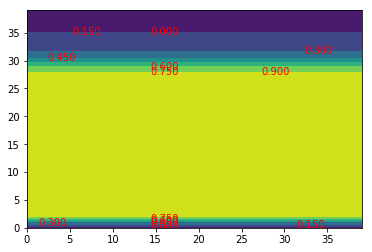

In [34]:
m = tempload.reshape(N,N)
cm = plt.contourf(m)
plt.clabel(cm,colors='r')

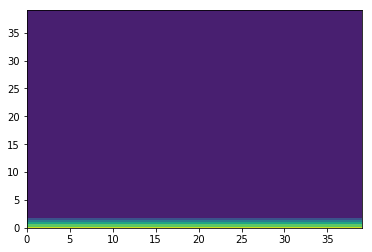

In [37]:
mart = martload.reshape(N,N)
plt.contourf(mart)

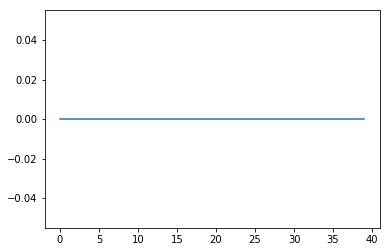

In [23]:
plt.plot(tempload.reshape(N,N)[:,20])

In [ ]:
%matplotlib inline
temperatureViewer.plot(path + "temperature100.png")

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

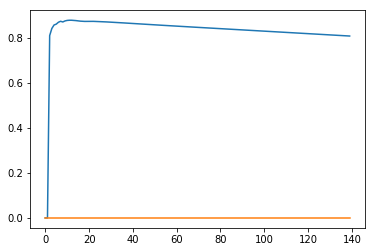

In [40]:
t=[]
t1=[]
for i in range(1,700,5):
    load = np.loadtxt(path+"martensiteOH"+str(i))
    t.append(load.reshape(N,N)[0,39])
    t1.append(load.reshape(N,N)[20,20])
plt.plot(t)
plt.plot(t1)

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

In [ ]:
plta = plt.plot(Tvstime)

In [ ]:
plt.plot(Tvstime)
plt.plot(temp)
plt.show()